In [1]:
import pandas as pd
import os

In [31]:
df = pd.DataFrame()
data = 'C:\\Users\\user\\Desktop\\Задания\\data'
for current_path, dirs, files in os.walk(data):
    for file in files:
        data_path = f'{current_path}\\{file}'
        data_nd = current_path.split('\\')
        df_part = pd.read_csv(data_path)
        df_part['name'] = data_nd[-1]
        df_part['date'] = data_nd[-2]
        df = pd.concat((df, df_part))
print (df)


    Unnamed: 0  product_id  quantity              name        date
0            0          47         1    Alexey_Smirnov  2020-12-03
1            1          57         1    Alexey_Smirnov  2020-12-03
2            2          14         2    Alexey_Smirnov  2020-12-03
3            3          52         1    Alexey_Smirnov  2020-12-03
4            4           1         4    Alexey_Smirnov  2020-12-03
..         ...         ...       ...               ...         ...
1            1          66         4  Rostislav_Petrov  2020-12-09
2            2          39         2  Rostislav_Petrov  2020-12-09
0            0          82         4    Vasiliy_Ivanov  2020-12-09
1            1          74         2    Vasiliy_Ivanov  2020-12-09
2            2          54         3    Vasiliy_Ivanov  2020-12-09

[161 rows x 5 columns]


In [32]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True)
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
1,66,4,Rostislav_Petrov,2020-12-09
2,39,2,Rostislav_Petrov,2020-12-09
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09


In [40]:
quant = df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity', ascending=False)

In [48]:
max = quant['quantity'].max()
max_quant = quant.query('quantity == @max')
max_quant

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52


In [49]:
product = df.groupby('product_id').agg({'quantity':'sum'}).sort_values('quantity', ascending=False)
top_product = product.head(10)
top_product

,quantity
product_id,
27,20
56,18
74,15
24,15
41,14
66,13
94,13
34,13
50,12


In [50]:
import seaborn as sns

<Axes: xlabel='product_id', ylabel='quantity'>

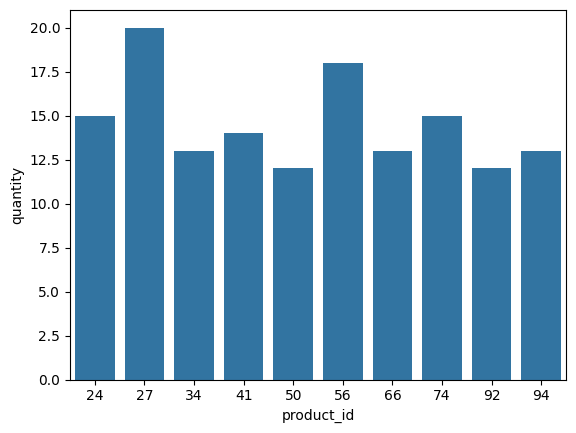

In [52]:
sns.barplot(top_product, x = 'product_id', y = 'quantity')

In [55]:
df.groupby(['name', 'product_id']).agg({'date':pd.Series.nunique}).query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
